# 修复

修复会替换或编辑图像的特定区域。

## 使用场景

常见的使用场景：

- 消除缺陷
- 用全新的东西替换图像区域

## 蒙版

依靠蒙版来确定要填充图像的哪些区域：

- 要修复的区域由白色像素表示
- 保留的区域由黑色像素表示
- 白色像素由提示填充

## 示例

### inpaint 模型

#### 官方示例

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

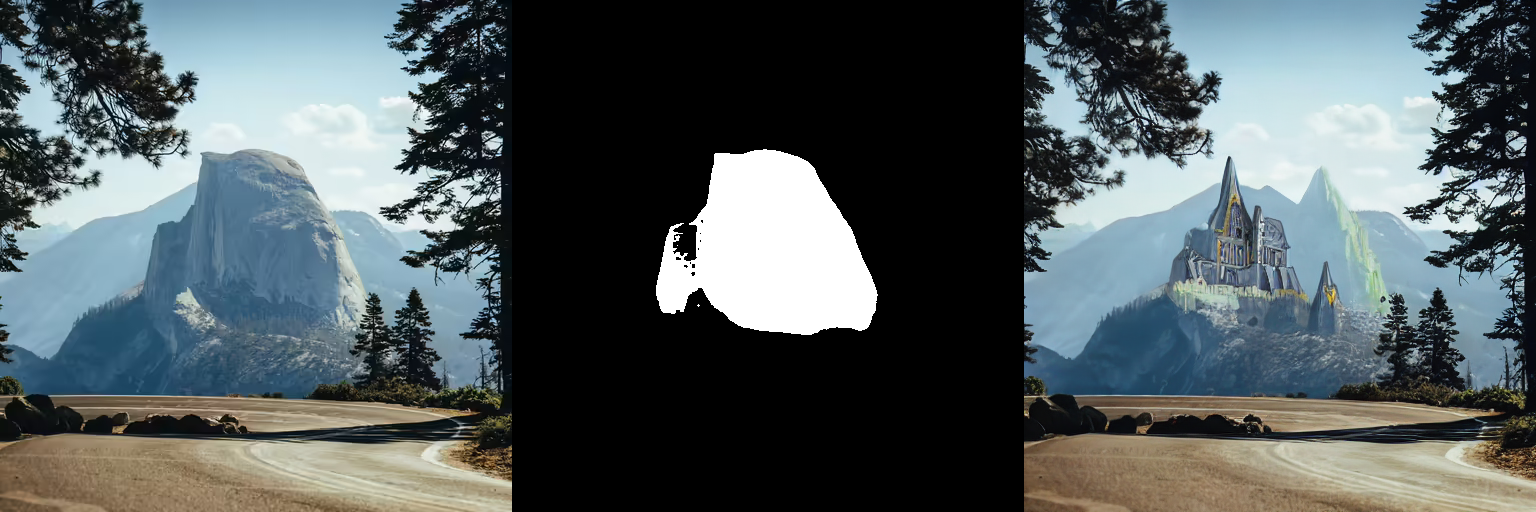

In [1]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

model_path="/models/stable-diffusion-inpainting"
pipeline = AutoPipelineForInpainting.from_pretrained(
    model_path, torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# load base and mask image
init_image = load_image("./inpaint.png")
mask_image = load_image("./inpaint_mask.png")

generator = torch.Generator("cuda").manual_seed(92)
prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]

make_image_grid([init_image, mask_image, image], rows=1, cols=3)

#### 自定义示例

  0%|          | 0/50 [00:00<?, ?it/s]

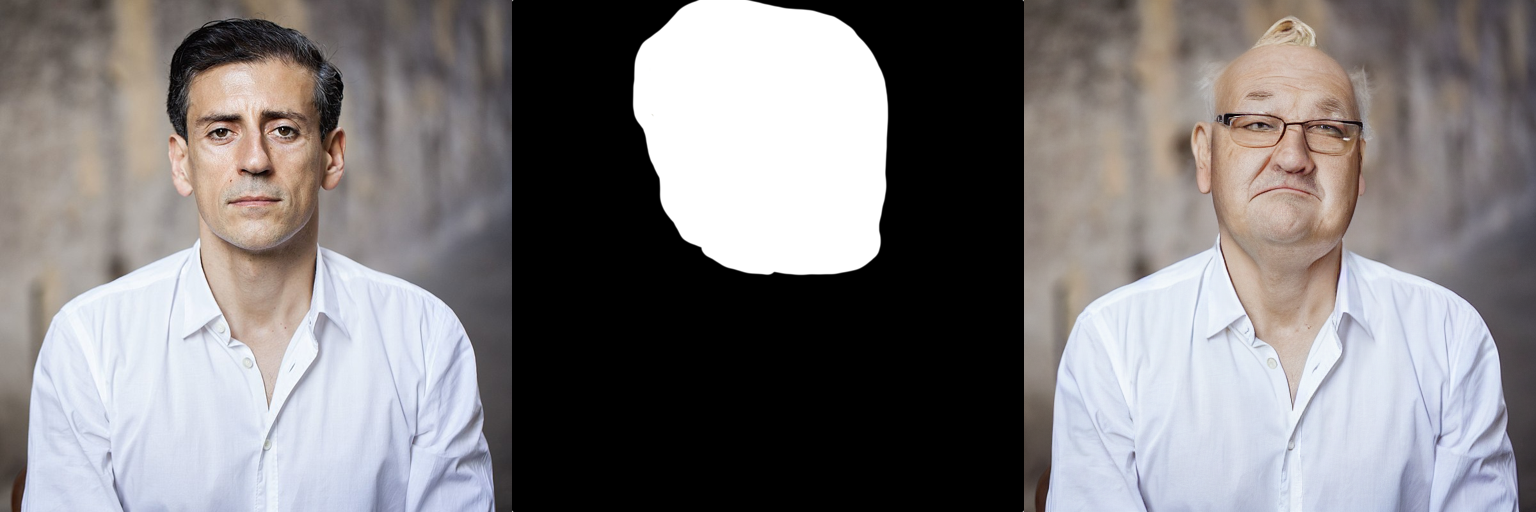

In [9]:
# load base and mask image
init_image = load_image("./inpaint2.jpeg")
mask_image = load_image("./inpaint_mask2a.png")

generator = torch.Generator("cuda").manual_seed(10)
prompt = "The face of a fat older man, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]

make_image_grid([init_image,mask_image, image], rows=1, cols=3,resize=512)
# image

### 常规模型